# DSP1: Assignment 1

### Deadline: January 12 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted  For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment1.ipynb (ex. Elon_Musk_200X_Assignment1.ipynb)

## Q1 (20%)
Read video games sales data from vgsales.csv file. This dataset contains a list of video games with sales greater than 100,000 copies. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

**Tasks to do:**
1. Using your favorite visualization library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales? 
2. What is the average sales for each region? 
3. What is the standard deviation for each region?
4. How many outliers (using IQR rule) we have in Global_Sales column?
5. What is the difference between mean and median values in Global_Sales column? 
6. Remove outliers and plot histogram and boxplot again. 
7. What is the difference between mean and median now?
8. In your opinion what happened, why difference between mean and median have changed?

*Hint: use pandas to read dataset.*

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("vgsales.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37


## Q1.2

In [3]:
#convert data types from object to float for calculations
data['NA_Sales'] = data['NA_Sales'].astype(float)
data['EU_Sales'] = data['EU_Sales'].astype(float)
data['JP_Sales'] = data['JP_Sales'].astype(float)
data['Other_Sales'] = data['Other_Sales'].astype(float)
data['Global_Sales'] = data['Global_Sales'].astype(float)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#task 2
my_data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
print('Average sales for each region: \n' + str(np.mean(my_data)))

Average sales for each region: 
NA_Sales        0.264667
EU_Sales        0.146652
JP_Sales        0.077782
Other_Sales     0.048063
Global_Sales    0.537441
dtype: float64


## Q1.3

In [5]:
#task 3 (by using variance)
variance = np.var(my_data)
np.sqrt(variance) #std is a variance under root
#np.std(my_data)
print('Standard deviation for each region: \n' + str(np.sqrt(variance)))

Standard deviation for each region: 
NA_Sales        0.816658
EU_Sales        0.505336
JP_Sales        0.309281
Other_Sales     0.188583
Global_Sales    1.554981
dtype: float64


In [6]:
#task 4
def find_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    upper_rg = Q3 + (1.5 * IQR)
    lower_rg = Q1 - (1.5 * IQR)
    return lower_rg,upper_rg

In [7]:
lowerbound,upperbound = find_outliers(data.Global_Sales)
outliers = data.Global_Sales[(data.Global_Sales < lowerbound) | (data.Global_Sales > upperbound)]

print('Global_Sales column has', len(outliers), 'outliers.')
outliers

Global_Sales column has 1893 outliers.


0       82.74
1       40.24
2       35.82
3       33.00
4       31.37
        ...  
1888     1.09
1889     1.09
1890     1.09
1891     1.09
1892     1.09
Name: Global_Sales, Length: 1893, dtype: float64

In [8]:
print('', np.mean(data.Global_Sales))
print('', np.median(data.Global_Sales))

 0.53744065550074
 0.17


- mean > meadian, this indicates a positively-skewed distribution

In [9]:
#task 6
data.drop(data[(data.Global_Sales > upperbound) | (data.Global_Sales < lowerbound)].index , inplace=True)

In [10]:
print(np.mean(data.Global_Sales))
print(np.median(data.Global_Sales))

0.23147432845973634
0.14


- mean > meadian, this indicates a positively-skewed distribution

In [11]:
agg_data = pd.pivot_table(data, values='NA_Sales', columns='Genre', aggfunc='sum')
agg_data

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,375.44,62.59,88.39,178.34,109.45,45.46,143.37,98.39,153.25,93.53,317.77,35.17


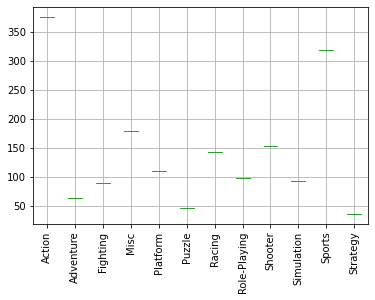

In [12]:
agg_data.boxplot(rot = 90)
plt.show()

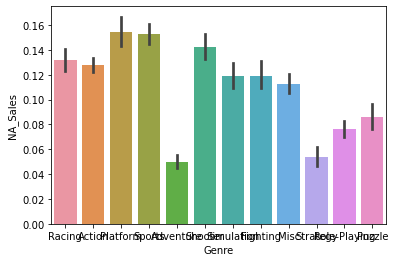

In [13]:
import seaborn as sns
sns.barplot(data=data, x='Genre', y='NA_Sales')
plt.show()

## Q2 (20%)
Suppose that S is a random variable of the AITU graduates salaries in the first year of work, which is assumed to be normally distributed with the population mean µ = 500 thousand KZT and the population standard deviation σ = 80 thousand KZT. 

**Find the following probabilities:**
1. A graduate will have salary below 450 thousand KZT?
2. A graduate will have salary below the median salary?
3. A graduate will have salary above 660 thousand KZT?
4. A graduate will have salary between 400 and 600 thousand KZT?
5. In a sample of 25 graduates, what percentage of that students will have salary between 480 and 520 thousand KZT?

*Hint: Use SciPy's norm module and write all answers in one cell (using print(command)) for convenience.*

In [14]:
from scipy.stats import norm

In [15]:
print('1)', norm.cdf(x=450, loc=500, scale=80))
print('2)', norm.cdf(x=500, loc=500, scale=80)) #mean = median = 500 
print('3)', 1 - norm.cdf(x=660, loc=500, scale=80))
print('4)', norm.cdf(x=600, loc=500, scale=80) - norm.cdf(x=400, loc=500, scale=80))
print('5)', 100 * (norm.cdf(x=520, loc=500, scale=80/5) - norm.cdf(x=480, loc=500, scale=80/5))) #78.8%

1) 0.26598552904870054
2) 0.5
3) 0.02275013194817921
4) 0.7887004526662893
5) 78.87004526662894


## Q3 (20%)
We have a sample data about GPA for two groups of students (software engineers and big data analytics), which are presented in the lists below. Based on these data, do the following:
1. Construct 95% confidence interval for the population mean of software engineer students' GPA. State all the assumptions. 
2. Is there an evidence that average GPA for this group is larger than 2.9?
3. Construct 95% confidence interval for difference between two population means of GPA. State all the assumptions. 
4. Is there an evidence that one group has higher average GPA than another? If yes, which group performs better?
5. How your analysis would change in Task 1, if the sample size was 30? What if 20? Explain.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [16]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

In [17]:
gpa_bda = [3.16, 3.40, 3.61, 3.37, 3.24, 3.40, 3.00, 2.78, 3.22, 3.43, 3.32, 3.58,
           3.46, 3.45, 3.52, 3.13, 3.13, 3.81, 3.22, 3.65, 2.65, 3.51, 3.94, 3.86,
           3.30, 3.31, 3.45, 3.17, 3.57, 3.90, 3.54, 3.41, 3.39, 3.99, 3.24, 3.50,
           3.44, 3.55, 3.40, 3.17, 3.18, 3.67, 3.64, 3.29, 3.32, 3.19, 2.71, 3.79,
           3.12, 3.32, 3.17, 3.38, 3.76, 3.19, 3.47, 3.41, 3.01, 3.47, 2.72, 3.16]

In [43]:
n_se = len(gpa_se)
mu_se = np.mean(gpa_se)
sigma_se = np.std(gpa_se)
n_se, mu_se, sigma_se

std_err_se = sigma_se /np.sqrt(n_se) #standart error for SE

lcb = mu_se - 1.96* std_err_se  #lower limit of the CI
ucb = mu_se + 1.96* std_err_se  #upper limit of the CI
(lcb, ucb)

(3.0813705142751955, 3.2428602549555743)

In [44]:
n_bda = len(gpa_bda)
mu_bda = np.mean(gpa_bda)
sigma_bda = np.std(gpa_bda)
n_bda, mu_bda, sigma_bda

std_err_bda = sigma_bda/np.sqrt(n_bda)#standart error for BDA

In [49]:
mu_d = mu_bda - mu_se #difference in means
stderr_d = (np.sqrt((n_bda-1)*sigma_bda**2 + (n_se-1)*sigma_se**2)/(n_bda+n_se-2))*(np.sqrt(1/n_bda + 1/n_se))

lcb_d = mu_d - 1.96*stderr_d  #lower limit of the CI
ucb_d = mu_d + 1.96*stderr_d  #upper limit of the CI
(lcb_d, ucb_d)

(0.19658392406905367, 0.2171853067001761)

In [ ]:
#task 2

In [ ]:
#task 3


## Q4 (10%)
Consider the set of data below (my_list). Does it appear to approximately follow a normal distribution? Justify your answer.

*Hint: Check for the properties of the Normal distribution and for the graph of distribtuion.*

In [21]:
my_list = [113, 71, 89, 143, 140, 146, 122, 104, 134, 143, 110, 131, 125, 116, 
           164, 107, 113, 122, 119, 116, 98, 161, 128, 152, 116, 83, 86, 155,
           128, 122, 95, 122, 131, 134, 107, 113, 101, 92, 134, 140]

In [22]:
n = len(my_list)
mu = round(sum(my_list)/len(my_list))
sigma = round(np.std(my_list), 4)

mode = max(my_list, key = my_list.count)
median = round(np.median(my_list))
print('Size:'+ str(n) + '\n' + 'Mean:' + str(mu) + '\n'+ 'Std.:' + str(sigma) 
      + '\n' + 'Mode:'+ str(mode) + '\n' + 'Median:'+ str(median))

Size:40
Mean:121
Std.:21.4552
Mode:122
Median:122


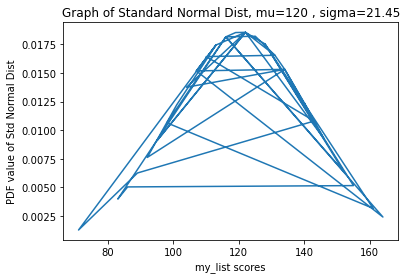

In [23]:
Y = norm.pdf(my_list, loc=120.65, scale=21.45)  #array of probabilities

plt.plot(my_list, Y)
plt.title('Graph of Standard Normal Dist, mu=120 , sigma=21.45')
plt.xlabel('my_list scores')
plt.ylabel('PDF value of Std Normal Dist');

The data above is approximately follow a normal distribution, because:
- x_bar(mean) is normal, since sample size is large n = 40 (> 30).
- Determined by mean and std..
- The mean, median and mode are exactly the same.
- By graph: the distribution is symmetric about the mean—half the values fall below the mean and half above the mean.
- The distribution can be described by two values: the mean and the standard deviation.

## Q5 (10%)
Generate synthetic data (numpy.random.normal) with mean = 70, std = 12 and size = 1000 (round it to nearest integer). 

__Tasks to do:__
1. Plot histogram
2. What is the mean, median and mode
3. Build function to calculate standard deviation using standard Python functionality
4. Calculate std. using your function and compare it with numpy function

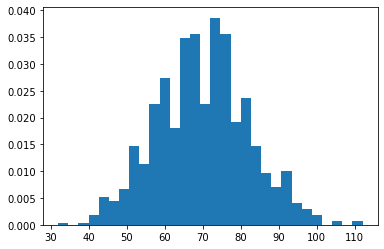

In [24]:
n = 1000
mu = 70 #mean
sigma = 12 #std
s = np.random.normal(mu, sigma, n)
data = [np.round(x) for x in s]

# Histogram
plt.hist(x=data, bins=30, density=True);

task 2: what is Mean, median, mode?

In [42]:
mean = round(sum(data)/len(data))
print('Mean:', mean)
    
median = round(np.median(data))
print('Median:', median)

mode = max(data, key = data.count)
print('Mode:', mode)

Mean: 70
Median: 70
Mode: 72.0


In [26]:
def calc_std(X):
    sigma = 0.0
    mu = round(sum(X)/len(X), 4)
    n = len(X)
    for x in X:
        sigma += (x - mu)**2   
    sigma = sigma/n
    sigma = sigma**(1/2)
    sigma = round(sigma, 4)
    return sigma

In [27]:
print('function std.:', calc_std(data))
print('numpy std.:',round(np.std(data), 4))

function std.: 12.0646
numpy std.: 12.0646


## Q6 (10%)
Prove the following expression:

$$Var(X) = E((X-\mu)^2) = E(X^2) - (E(X))^2$$



*Hint: For proof write it down in markdown cell below using LaTex.*

In [28]:
# Please, write your proof here (as markdown)

## Q7 (10%)
For each of the cases of confidence intervals in the lecture (3 simple and 5 complicated) find/create an example and mention corresponding assumptions such as sample size or original distribution or variance. Also, note that you should not use examples that was presented during the lecture. 

*Note: no need to create a problem, just a situation which will correspond to the confidence interval case.*

In [29]:
# Please, write your examples here (as markdown)

---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   20/20    |     
| 2       |   20/20 | 
| 3       |   20/20    |     
| 4       |   10/10 | 
| 5       |   10/10    |     
| 6       |   10/10 | 
| 7       |   10/10    |     
|**Total**|**100/100**  | 
